# Marketing Campaigns

## Steps to Perform:

*	Once data is imported, investigate variables like Dt_Customer and Income, etc., and check if they are imported correctly.

*	Income values for a few customers are missing. Perform missing value imputation. Assume that the customers with similar education and marital status make the same yearly income, on average. You may have to clean the data before performing this. For data cleaning, look into the categories of education and marital status.

*	Create variables to populate the total number of children, age, and total spending.

Hint:   From the number of purchases through the three channels, people can derive the total purchases.

*	Create box plots and histograms to understand the distributions and outliers. Perform outlier treatment.

*	Use ordinal encoding and one hot encoding according to different types of categorical variables.

*	Create a heatmap to showcase the correlation between different pairs of variables.

*	Test the following hypotheses:

  *	Older people are not as tech-savvy and probably prefer shopping in-store.
  *	Customers with kids probably have less time to visit a store and would prefer to shop online.
  *	Other distribution channels may cannibalize sales at the store.
  *	Does the US fare significantly better than the rest of the world in terms of total purchases?


*	Use appropriate visualization to help analyze the following:

  *	Which products are performing the best, and which are performing the least in terms of revenue?
  *	Is there any pattern between the age of customers and the last campaign acceptance rate?
  *	Which Country has the greatest number of customers who accepted the last campaign?
  *	Do you see any pattern in the no. of children at home and total spend?
  *	Education background of the customers who complained in the last 2 years.



# Import & Load the dataset:

In [1]:
# Clone the repository that contains the data
!git clone https://github.com/AnasAlmana/data.git

Cloning into 'data'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 66.43 KiB | 1.11 MiB/s, done.


In [2]:
import pandas as pd
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
df = pd.read_csv("/content/data/marketing_data.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb


**The dataset contains 28 Columns, and 2240 Rows.**
- Column `  Income` should be renamed to `Income` and transformed to `Floats` Data type.
- `Dt_Customer` data type should be transformed to `datetime`



## Convert `Dt_Customer` column to datetime

In [5]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

# Perform cleaning for column `Income`

In [6]:
# rename column 'Income'
df = df.rename(columns={df.columns[4]: 'Income'})
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
4# remove '$' ',' and change dtype to floats
replace_dict= {"$":"",",":""," ":""}
for old, new in replace_dict.items():
   df['Income'] = df['Income'].str.replace(old, new)

df['Income'] = df['Income'].astype(float)
df['Income']

<ipython-input-7-c1617a363fe0>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace(old, new)


0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

## Perform missing value imputation

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

### Cleaning `Education` and `Marital_Status` columns

In [9]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [10]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

As we can see above, data contains 5 education types, and 8 martial status.

In [11]:
# How many data points each marital status contains:
for s in df['Marital_Status'].unique():
  print(f"Total No. of {s}: {len(df[(df['Marital_Status'] == s)])}")

Total No. of Divorced: 232
Total No. of Single: 480
Total No. of Married: 864
Total No. of Together: 580
Total No. of Widow: 77
Total No. of YOLO: 2
Total No. of Alone: 3
Total No. of Absurd: 2


In [12]:
# How many data points each marital status contains:
for e in df['Education'].unique():
  print(f"Total No. of {e}: {len(df[(df['Education'] == e)])}")

Total No. of Graduation: 1127
Total No. of PhD: 486
Total No. of 2n Cycle: 203
Total No. of Master: 370
Total No. of Basic: 54


**According to above analysis, we can shrink number of marital status to 5 by merging "*YOLO*", "*Alone*", and "*Absurd*" with "*Single*" since it is the least marital status.**

In [13]:
df.replace('YOLO', 'Single', inplace=True)
df.replace('Alone', 'Single', inplace=True)
df.replace('Absurd', 'Single', inplace=True)
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

### Calculate average of Income grouped by Marital Status and Education and fill null values with the average based on each combination.

In [14]:
marital_stat = df['Marital_Status'].unique()
edu = df['Education'].unique()
for m in marital_stat:
  for e in edu:
    comb_df = df[(df['Marital_Status'] == m) & (df["Education"] == e)]
    comb_mean = comb_df['Income'].mean()
    df[(df['Marital_Status'] == m) & (df["Income"].isna() == True) & (df["Education"] == e)] = df[(df['Marital_Status'] == m) & (df["Education"] == e)].fillna(comb_mean)


In [15]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

# Calculate age, Total children, and Total Spending:

In [16]:
import time
df['age'] = int(time.ctime()[-4:]) - df['Year_Birth']
df['age'].head()

0    53
1    62
2    65
3    56
4    34
Name: age, dtype: int64

In [17]:
df['total_children'] = df['Kidhome'] + df['Teenhome']
df['total_spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,total_children,total_spending
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,53,0,1190
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,62,0,577
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,65,1,251
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,56,2,11
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,34,1,91


# Box Plots, Histograms, and Outliers.

## Histograms:

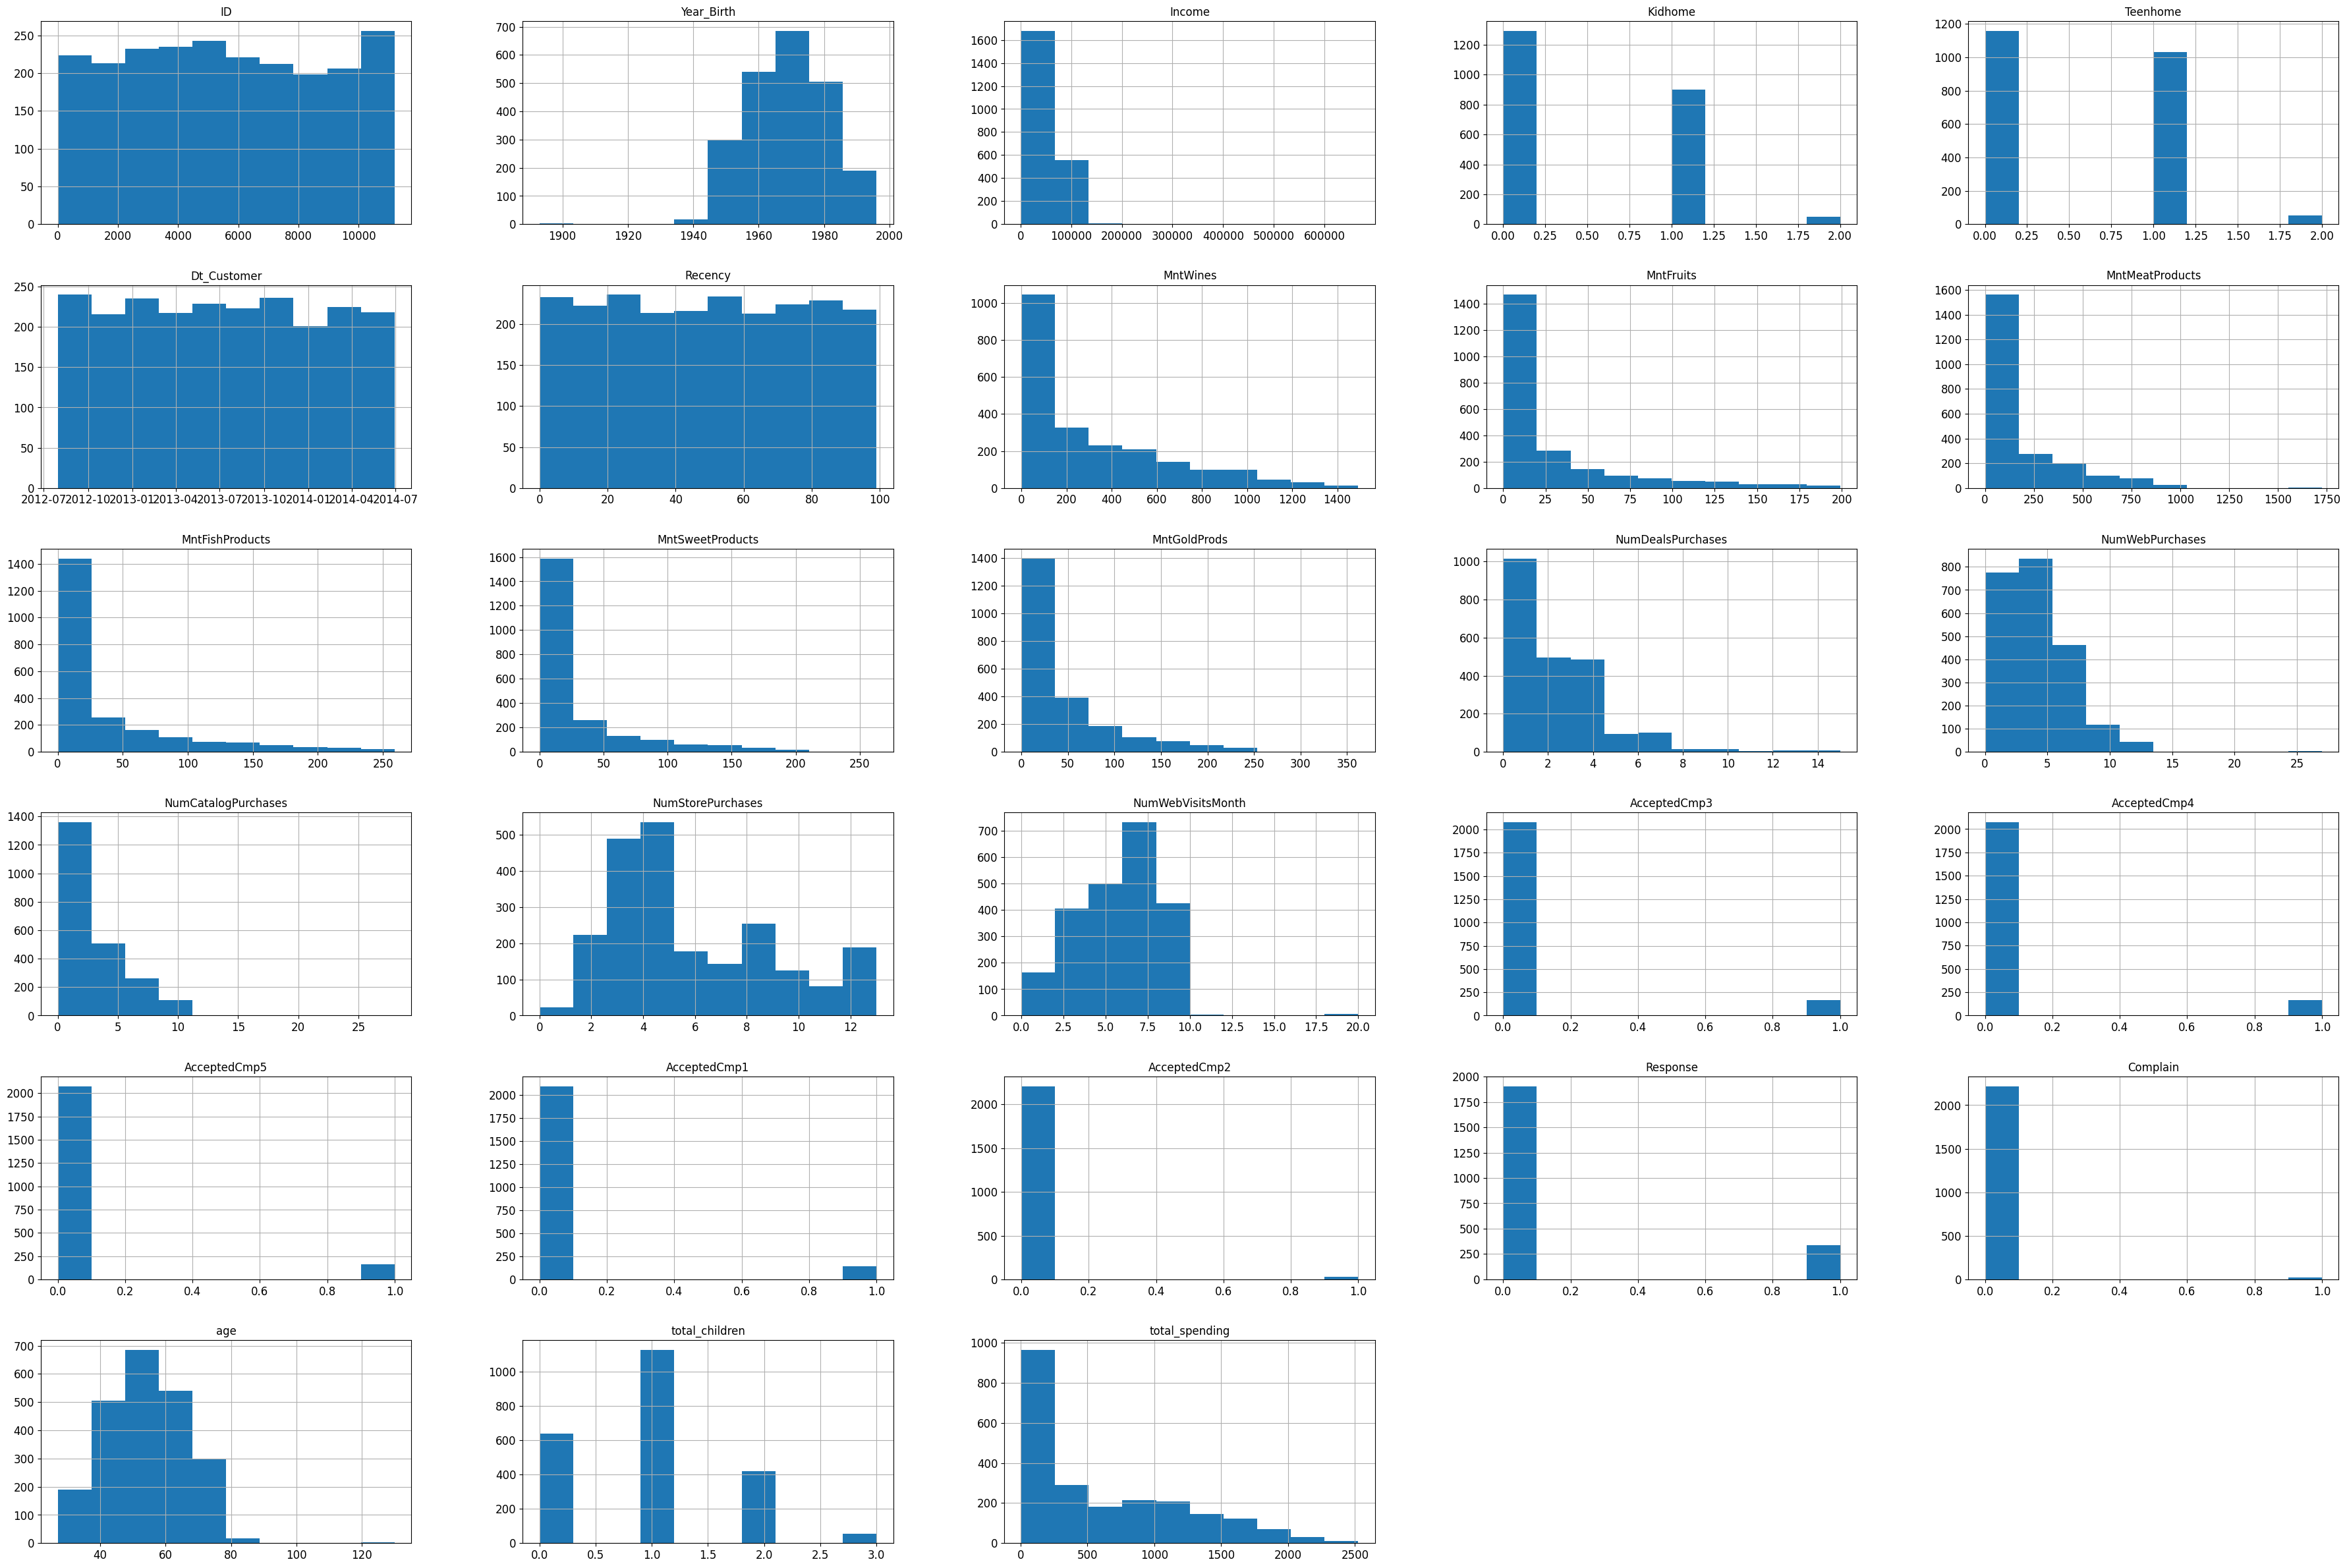

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

df.hist(figsize=(45,30));
plt.figure();

## Box-Plot:

In [19]:
import seaborn as sns
# Detect Outliers using boxplot

columns = ['Year_Birth', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'age']

[]

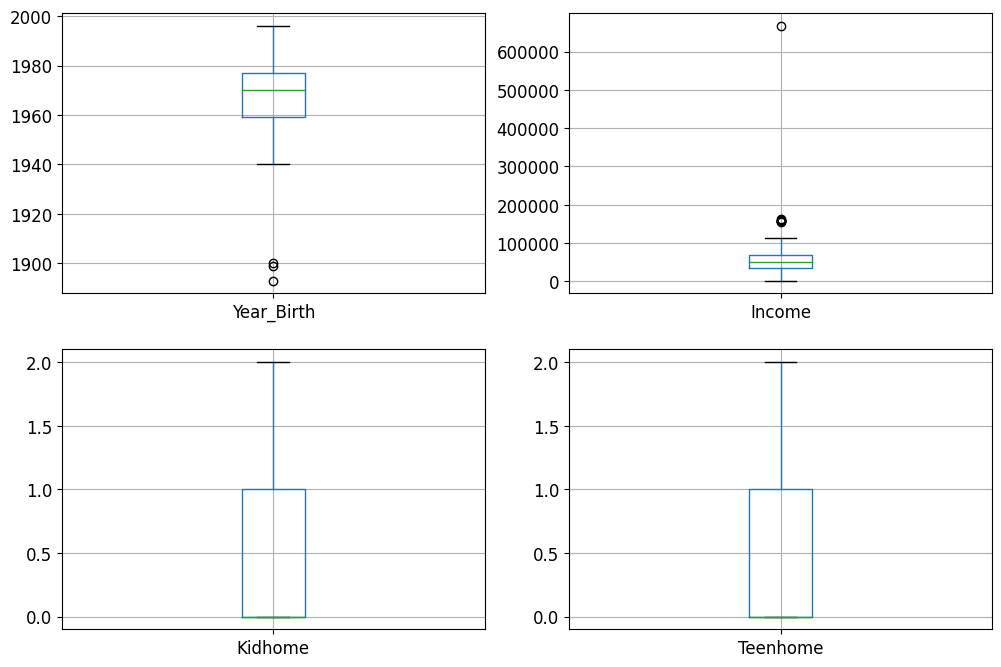

In [20]:
plt.figure(figsize=(12,8))

plt.subplot(221)
b_plot = df.boxplot(column =columns[0])
b_plot.plot()

plt.subplot(222)
b_plot = df.boxplot(column =columns[1])
b_plot.plot()

plt.subplot(223)
b_plot = df.boxplot(column =columns[2])
b_plot.plot()

plt.subplot(224)
b_plot = df.boxplot(column =columns[3])
b_plot.plot()

[]

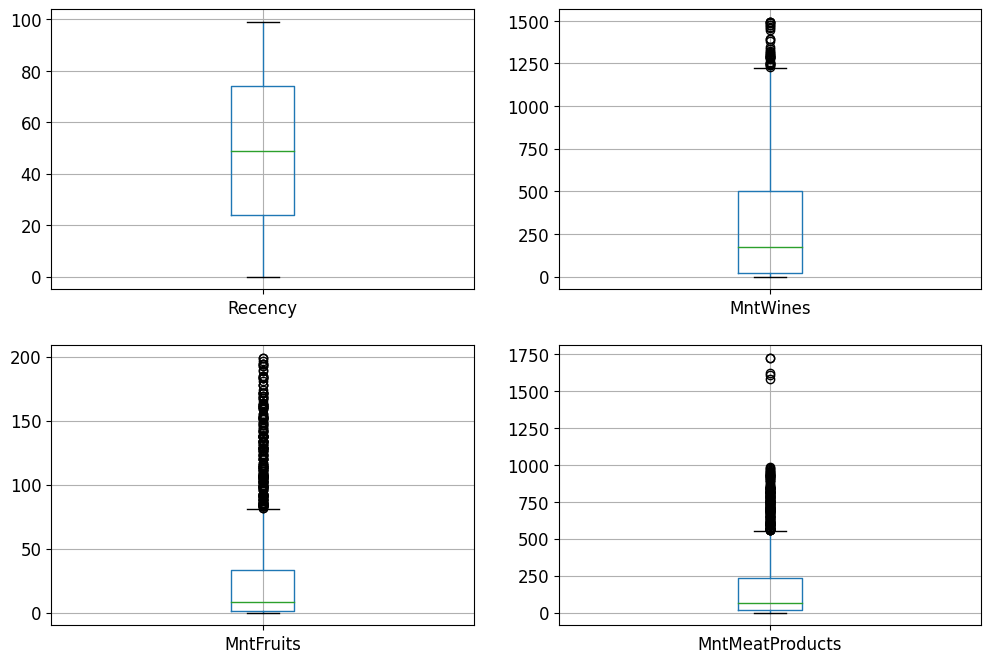

In [21]:
plt.figure(figsize=(12,8))

plt.subplot(221)
b_plot = df.boxplot(column =columns[4])
b_plot.plot()

plt.subplot(222)
b_plot = df.boxplot(column =columns[5])
b_plot.plot()

plt.subplot(223)
b_plot = df.boxplot(column =columns[6])
b_plot.plot()

plt.subplot(224)
b_plot = df.boxplot(column =columns[7])
b_plot.plot()

[]

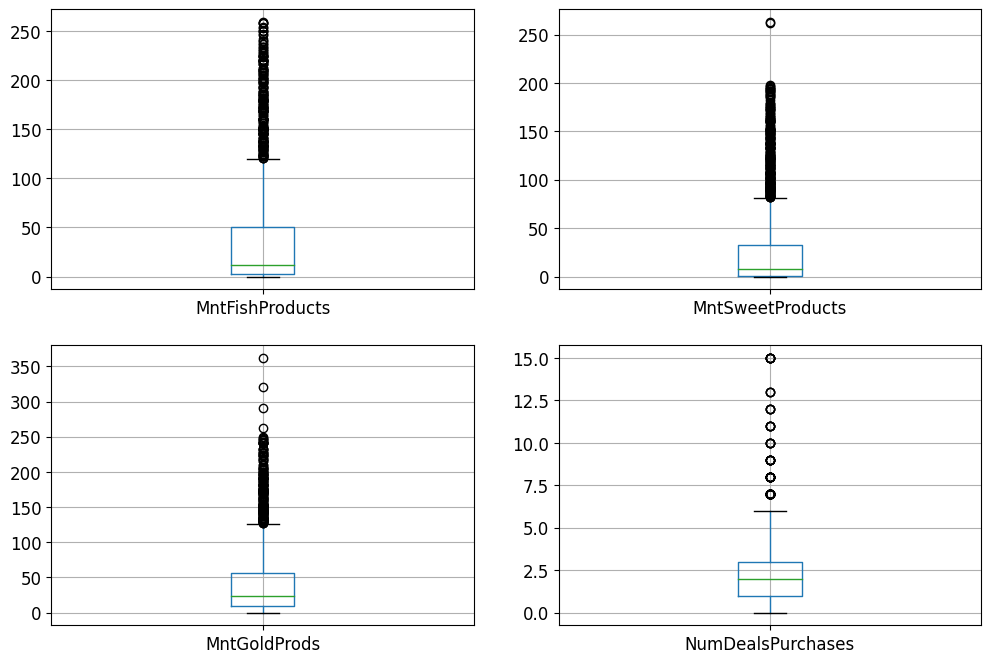

In [22]:
plt.figure(figsize=(12,8))

plt.subplot(221)
b_plot = df.boxplot(column =columns[8])
b_plot.plot()

plt.subplot(222)
b_plot = df.boxplot(column =columns[9])
b_plot.plot()

plt.subplot(223)
b_plot = df.boxplot(column =columns[10])
b_plot.plot()

plt.subplot(224)
b_plot = df.boxplot(column =columns[11])
b_plot.plot()

[]

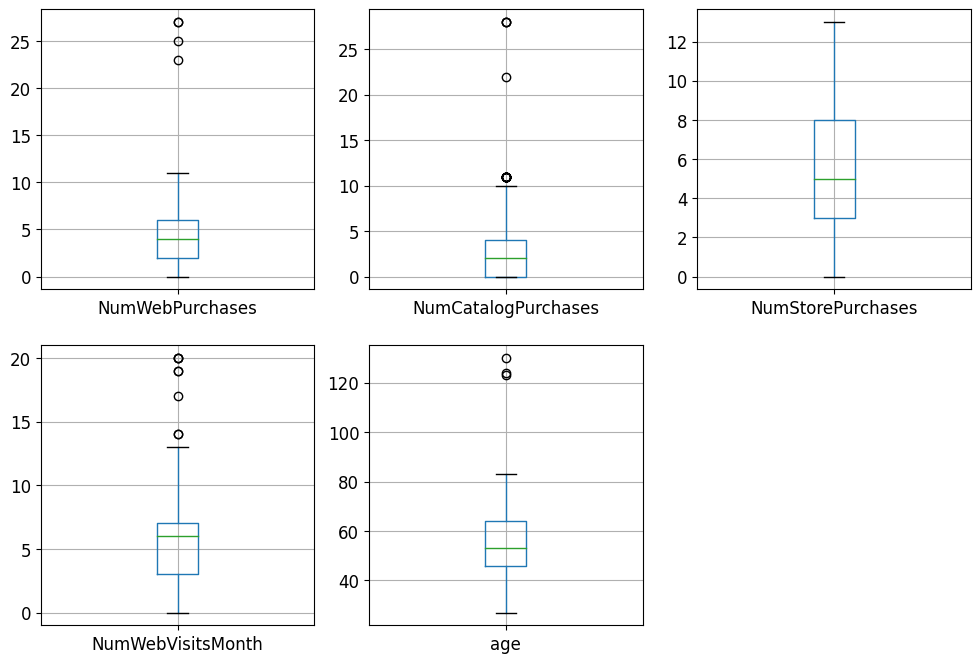

In [23]:
plt.figure(figsize=(12,8))

plt.subplot(231)
b_plot = df.boxplot(column =columns[12])
b_plot.plot()

plt.subplot(232)
b_plot = df.boxplot(column =columns[13])
b_plot.plot()

plt.subplot(233)
b_plot = df.boxplot(column =columns[14])
b_plot.plot()

plt.subplot(234)
b_plot = df.boxplot(column =columns[15])
b_plot.plot()

plt.subplot(235)
b_plot = df.boxplot(column =columns[16])
b_plot.plot()

### Outliers Treatment:

In [24]:
# columns delete outliers from>
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1
df = df[~(( df[list(df[columns].columns)] < (Q1 - 1.5 * IQR)) |(df[list(df[columns].columns)] > (Q3 + 1.5 * IQR))).any(axis=1)]

[]

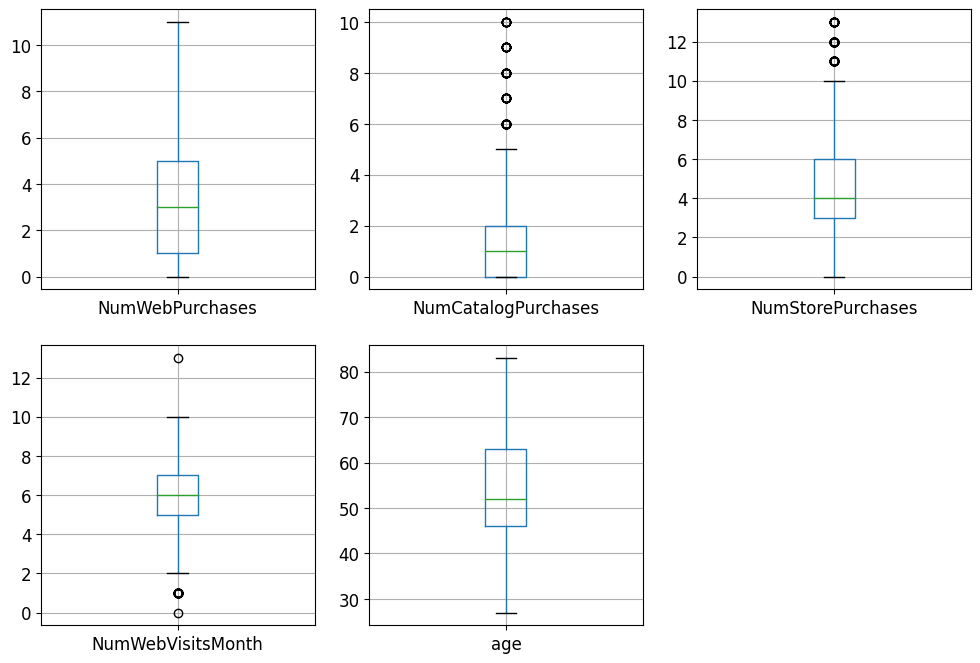

In [25]:
# Plotting last 4 columns after dropping outliers..
plt.figure(figsize=(12,8))

plt.subplot(231)
b_plot = df.boxplot(column =columns[12])
b_plot.plot()

plt.subplot(232)
b_plot = df.boxplot(column =columns[13])
b_plot.plot()

plt.subplot(233)
b_plot = df.boxplot(column =columns[14])
b_plot.plot()

plt.subplot(234)
b_plot = df.boxplot(column =columns[15])
b_plot.plot()

plt.subplot(235)
b_plot = df.boxplot(column =columns[16])
b_plot.plot()

# Correlation Heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

<ipython-input-26-a89d6345de72>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

# Encoding

## Ordinal Encoding

In [ ]:
column_o= ['Education','Country']
ordinal = df[column_o].copy()
df_encoded = df.copy()
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
Ordinal_Encoding = OrdinalEncoder()
Ordinal_Encoding = Ordinal_Encoding.fit_transform(ordinal)
Ordinal_Encoding = pd.DataFrame(Ordinal_Encoding)

# Rename columns
Ordinal_Encoding = Ordinal_Encoding.rename(columns={Ordinal_Encoding.columns[0]: 'Education'})
Ordinal_Encoding = Ordinal_Encoding.rename(columns={Ordinal_Encoding.columns[1]: 'Country'})
Ordinal_Encoding.head()

In [ ]:
df_encoded.drop(['Education','Country'], axis=1, inplace=True)
df_encoded.columns

In [ ]:
df_encoded = pd.concat([df_encoded, Ordinal_Encoding], axis=1)

In [ ]:
df_encoded.head()

## Hot Encoding

In [ ]:
#one-hot ordinal
One_Hot_Encoding = pd.get_dummies(df['Marital_Status'])
One_Hot_Encoding

In [ ]:
df_encoded.drop(['Marital_Status'], axis=1, inplace=True)
df_encoded.columns

In [ ]:
df_encoded = pd.concat([df_encoded, One_Hot_Encoding], axis=1)
df_encoded.head()

As shown above, we encoded the columns 'Education' and 'Country' using ordinal encoding, and one hot-encoding for column 'Marital_Status'.

# Hypotheses Testing:

1. Older people are not as tech-savvy and probably prefer shopping in-store.
2. Customers with kids probably have less time to visit a store and would prefer to shop online.
3. Other distribution channels may cannibalize sales at the store.
4. Other distribution channels may cannibalize sales at the store.

## 1. Older people are not as tech-savvy and probably prefer shopping in-store.
  

**Null hypotheses: $\mu_{p-old} = \mu_{p-young}$**

Means that there is no difference between older and young people in prefering shopping in store or online.


---


**Alternate hypothesis: $\mu_{p-old} \ne \mu_{p-young}$**

Means that there is difference between older and young people in prefering shopping in store or online.

In [ ]:
"""
We will apply t-test on the following columns:
NumWebPurchases:	     no of purchases made through company's website
NumCatalogPurchases:	 no of purchases made using catalogue
NumStorePurchases:	   no of purchases made directly in store
NumWebVisitsMonth:	   no of visits to company's website in the last month
"""
from scipy.stats import ttest_ind
age_threshold = 50  # assume older people > 50
older_customers = df[df['age'] >= age_threshold]
younger_customers = df[df['age'] < age_threshold]

columns = ['NumWebPurchases', 'NumStorePurchases']

p_values = []
t_stats = []
print("{:<25} {:<25} {:<25}\n".format('FEATURE:', 'T-VALUE:', 'P-VALUE:'))
for c in columns:
  t_stat, p_value = ttest_ind(older_customers[c], younger_customers[c])
  print("{:<25} {:<25} {:<25}".format(c,t_stat, p_value))


According to the above results,
P-values are less than 0.05 so we reject the null hypotheses.

Hence, we can say that older people prefer to shopping in-store

## 2. Customers with kids probably have less time to visit a store and would prefer to shop online.


**Null hypotheses: $\mu_{with-ch} = \mu_{without-ch}$**

Means that there is no significant difference in online (NumWebPurchases) shopping behavior between customers with kids and customers without kids.


---


**Alternate hypothesis: $\mu_{with-ch} \ne \mu_{without-ch}$**

Means that there is a significant difference in online (NumWebPurchases) shopping behavior between customers with kids and customers without kids.

In [ ]:
with_kids = df[df['total_children'] > 0]
without_kids = df[df['total_children'] == 0]


print("{:<25} {:<25}".format('T-VALUE:', 'P-VALUE:'))
t_stat, p_value = ttest_ind(with_kids['NumWebPurchases'], without_kids['NumWebPurchases'])
print("{:<25} {:<25}".format(t_stat, p_value))

According to the above results,

P-values are grater than 0.05.

Hence, fail to reject the null hypotheses.

## 3. Other distribution channels may cannibalize sales at the store.






**Null hypotheses: $\mu_{store} = \mu_{other}$**

Means that there is no significant difference between in-store channel and other channels.


---


**Alternate hypothesis: $\mu_{store} \ne \mu_{other}$**

Means that there is a significant difference between in-store channel and other channels.

In [ ]:
other_channels = df['NumWebPurchases'] + df['NumCatalogPurchases']
print("{:<25} {:<25}".format('T-VALUE:', 'P-VALUE:'))
t_stat, p_value = ttest_ind(df['NumStorePurchases'], other_channels)
print("{:<25} {:<25}".format(t_stat, p_value))

According to the above results,

P-values are grater than 0.05, fail to reject the null hypotheses.

Hence, there is no significant difference between in-store channel and other channels

## 4. Other distribution channels may cannibalize sales at the store.

In [ ]:
df['total_purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['total_purchases']

In [ ]:
TP_d = {}
country = df['Country'].unique()
for c in country:
  tmp = df[df['Country']==c].copy()
  sum = tmp['total_purchases'].sum()
  TP_d[c] = sum
TP_d

**Null hypotheses: $\mu_{US} = \mu_{world}$**

Means that there is no significant difference between the United States and the rest of the world in terms of total purchases.


---


**Alternate hypothesis: $\mu_{US} \ne \mu_{world}$**

would state that there is a significant difference between the two.


In [ ]:
from scipy.stats import ttest_ind
us_data = df[df['Country'] == 'US']['total_purchases']
rest_of_world_data = df[df['Country'] == 'SP']['total_purchases']
t_statistic, p_value = ttest_ind(us_data, rest_of_world_data)
print('T-statistic:', t_statistic)
print('P-value:', p_value)
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. The US fares significantly better than the rest of the world in terms of total purchases.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference between the US and the rest of the world in terms of total purchases.')

According to the P-value is greater than 0,05 so we fail reject the null hypotheses.


So there is no significant difference in total purchases between the United States and the rest of the world

# Visualization

## Which products are performing the best, and which are performing the least in terms of revenue?

In [ ]:
product_sums = []
product_names = ['Wines','Fruits','Meat','Fish','Sweet','Gold']
for c in list(df.columns[9:15]):
  product_sums.append(df[c].sum())

plt.bar(product_names,product_sums , color='green')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Product Revenue Performance')
plt.show()

## Is there any pattern between the age of customers and the last campaign acceptance rate?

In [ ]:
ax = sns.kdeplot(data=df, x=df['age'], hue=df['AcceptedCmp5'],multiple='fill', clip=[27,83])

# Set the tick locations and labels, can also use np array here
ax.set_yticks([0, 1])
ax.set_yticklabels(["0", "1"])
# Show the plot
plt.show()

## Which Country has the greatest number of customers who accepted the last campaign?

In [ ]:
accepted_customers = df[df['AcceptedCmp5'] == 1 ]
acceptance_counts = accepted_customers['Country'].value_counts()
plt.figure(figsize=(8, 6))
acceptance_counts.plot(kind='barh' , color='red')
plt.xlabel('Number of Acceptances')
plt.ylabel('Country')
plt.title('Number of Customers Who Accepted the Last Campaign by Country')
plt.show()

## If there is any pattern in the no. of children at home and total spend?

In [ ]:
plt.bar(df['total_children'], df['total_spending'], color='green')
plt.xlabel('Number of Children at Home')
plt.ylabel('Total Spend')
plt.title('Number of Children at Home vs. Total Spend')
plt.show()

## Education background of the customers who complained in the last 2 years.

In [ ]:
col= ['Education','Complain']
df_comp = df[df['Complain']==1].copy()

edu = df_comp['Education'].unique()
df_t = pd.DataFrame(columns=['Education','Count'])
for row in range(len(edu)):
  df_t.loc[row,'Education'] = edu[row]
  df_t.loc[row, 'Count'] = len(df_comp[df['Education'] == edu[row]])

plt.figure(figsize=(10, 6))
plt.bar(df_t['Education'], df_t['Count'])
plt.xlabel('Education Level')
plt.ylabel('Number of Complain')
plt.title('Education Background of Customers Who Complained (Last 2 Years)')
plt.tight_layout()
plt.show()